In [88]:
from pulsee.simulation import *

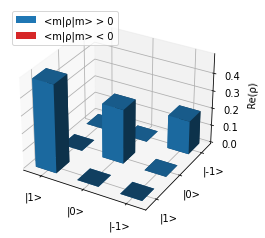

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

In [89]:
spin_par = {'quantum number' : 1.,
            'gamma/2pi' : 1.}
    
zeem_par = {'field magnitude' : 1.,
            'theta_z' : 0.,
            'phi_z' : 0.}
                
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, quad_par=None, 
                                                 zeem_par=zeem_par, initial_state='canonical', 
                                                 temperature=1e-4)

plot_real_part_density_matrix(dm_0)

In [90]:
f, p = power_absorption_spectrum(spin, h_unperturbed, normalized=True)


In [91]:
mode = pd.DataFrame([(2 * np.pi, 0.2, 0., np.pi/2, 0.)], 
                     columns=['frequency', 'amplitude', 'phase', 'theta_p', 'phi_p'])

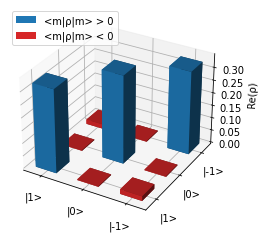

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

In [92]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, pulse_time=1 / (4 * 0.1), \
                    picture = 'IP')
    
plot_real_part_density_matrix(dm_evolved)

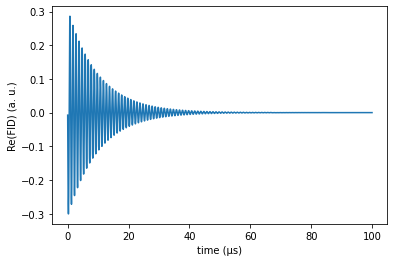

In [94]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=100)

_ = plot_real_part_FID_signal(t, fid)

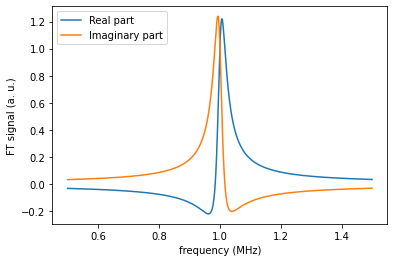

In [102]:
f, ft = fourier_transform_signal(fid, t)
    
fig, ax = plot_fourier_transform(f, ft, xlim=(0.5, 1.5))


In [104]:
quad_par = {'coupling constant' : 0.2,
            'asymmetry parameter' : 0.,
            'alpha_q' : 0.,
            'beta_q' : 0.,
            'gamma_q' : 0.}
            
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, quad_par=quad_par,
												 zeem_par=zeem_par, initial_state='canonical', 
												 temperature=1e-4)

In [105]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, pulse_time=1 / (4 * 0.1), \
                    picture = 'IP')


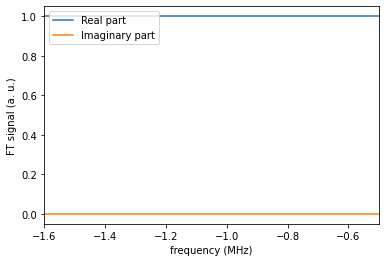

(<Figure size 432x288 with 1 Axes>,
 [<AxesSubplot:xlabel='frequency (MHz)', ylabel='FT signal (a. u.)'>])

In [109]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=100)
f, ft = fourier_transform_signal(fid, t) 
plot_fourier_transform(f, ft, xlim=(0.5, 1.5))

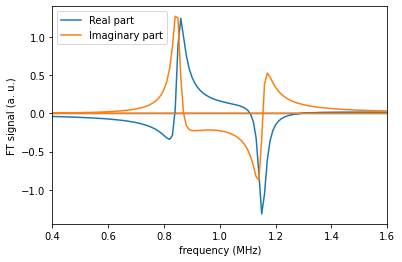

(<Figure size 432x288 with 1 Axes>,
 [<AxesSubplot:xlabel='frequency (MHz)', ylabel='FT signal (a. u.)'>])

In [66]:
phi = fourier_phase_shift(f, ft, peak_frequency=0.82, int_domain_width=0.2)

plot_fourier_transform(f, np.exp(1j * phi) * ft, xlim=(0.4, 1.6))


In [82]:
spin_par = {'quantum number' : 3/2,
            'gamma/2pi' : 1.}
    
quad_par = {'coupling constant' : 2.,
            'asymmetry parameter' : 0.,
            'alpha_q' : 0.,
            'beta_q' : 0.,
            'gamma_q' : 0.}
            
spin, h_unperturbed, dm_0 = nuclear_system_setup(spin_par=spin_par, 
												 quad_par=quad_par, zeem_par=None, 
												 initial_state='canonical', 
												 temperature=1e-4)

In [84]:
dm_evolved = evolve(spin, h_unperturbed, dm_0, solver=magnus, \
                    mode=mode, pulse_time=1 / (4 * 0.1), \
                    picture = 'IP')

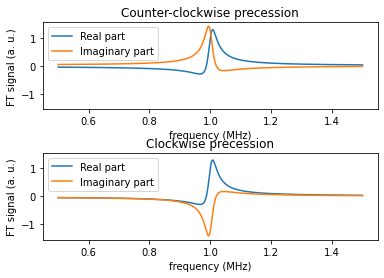

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Counter-clockwise precession'}, xlabel='frequency (MHz)', ylabel='FT signal (a. u.)'>,
        <AxesSubplot:title={'center':'Clockwise precession'}, xlabel='frequency (MHz)', ylabel='FT signal (a. u.)'>],
       dtype=object))

In [70]:
t, fid = FID_signal(spin, h_unperturbed, dm_evolved, acquisition_time=100, T2=10, n_points=100)
f, ft, ft_n = legacy_fourier_transform_signal(t, fid, 0.5, 1.5, 
											  opposite_frequency=True)

plot_fourier_transform(f, ft, ft_n)